In [119]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [120]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl

# Importing Dataset Airplane_Crashes_Since_1908.csv

In [121]:
dataset = pd.read_csv("Airplane_Crashes_Since_1908.csv")
dataset.head(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."


In [122]:
dataset.tail(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [123]:
dataset.count()

Date            5268
Time            3049
Location        5248
Operator        5250
Flight #        1069
Route           3562
Type            5241
Registration    4933
cn/In           4040
Aboard          5246
Fatalities      5256
Ground          5246
Summary         4878
dtype: int64

# Adding Two New Column Year and Survived

In [124]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year
dataset['Survived'] = dataset['Aboard'] - dataset['Fatalities']
dataset.head(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0


# Yearly Airplane Crashed

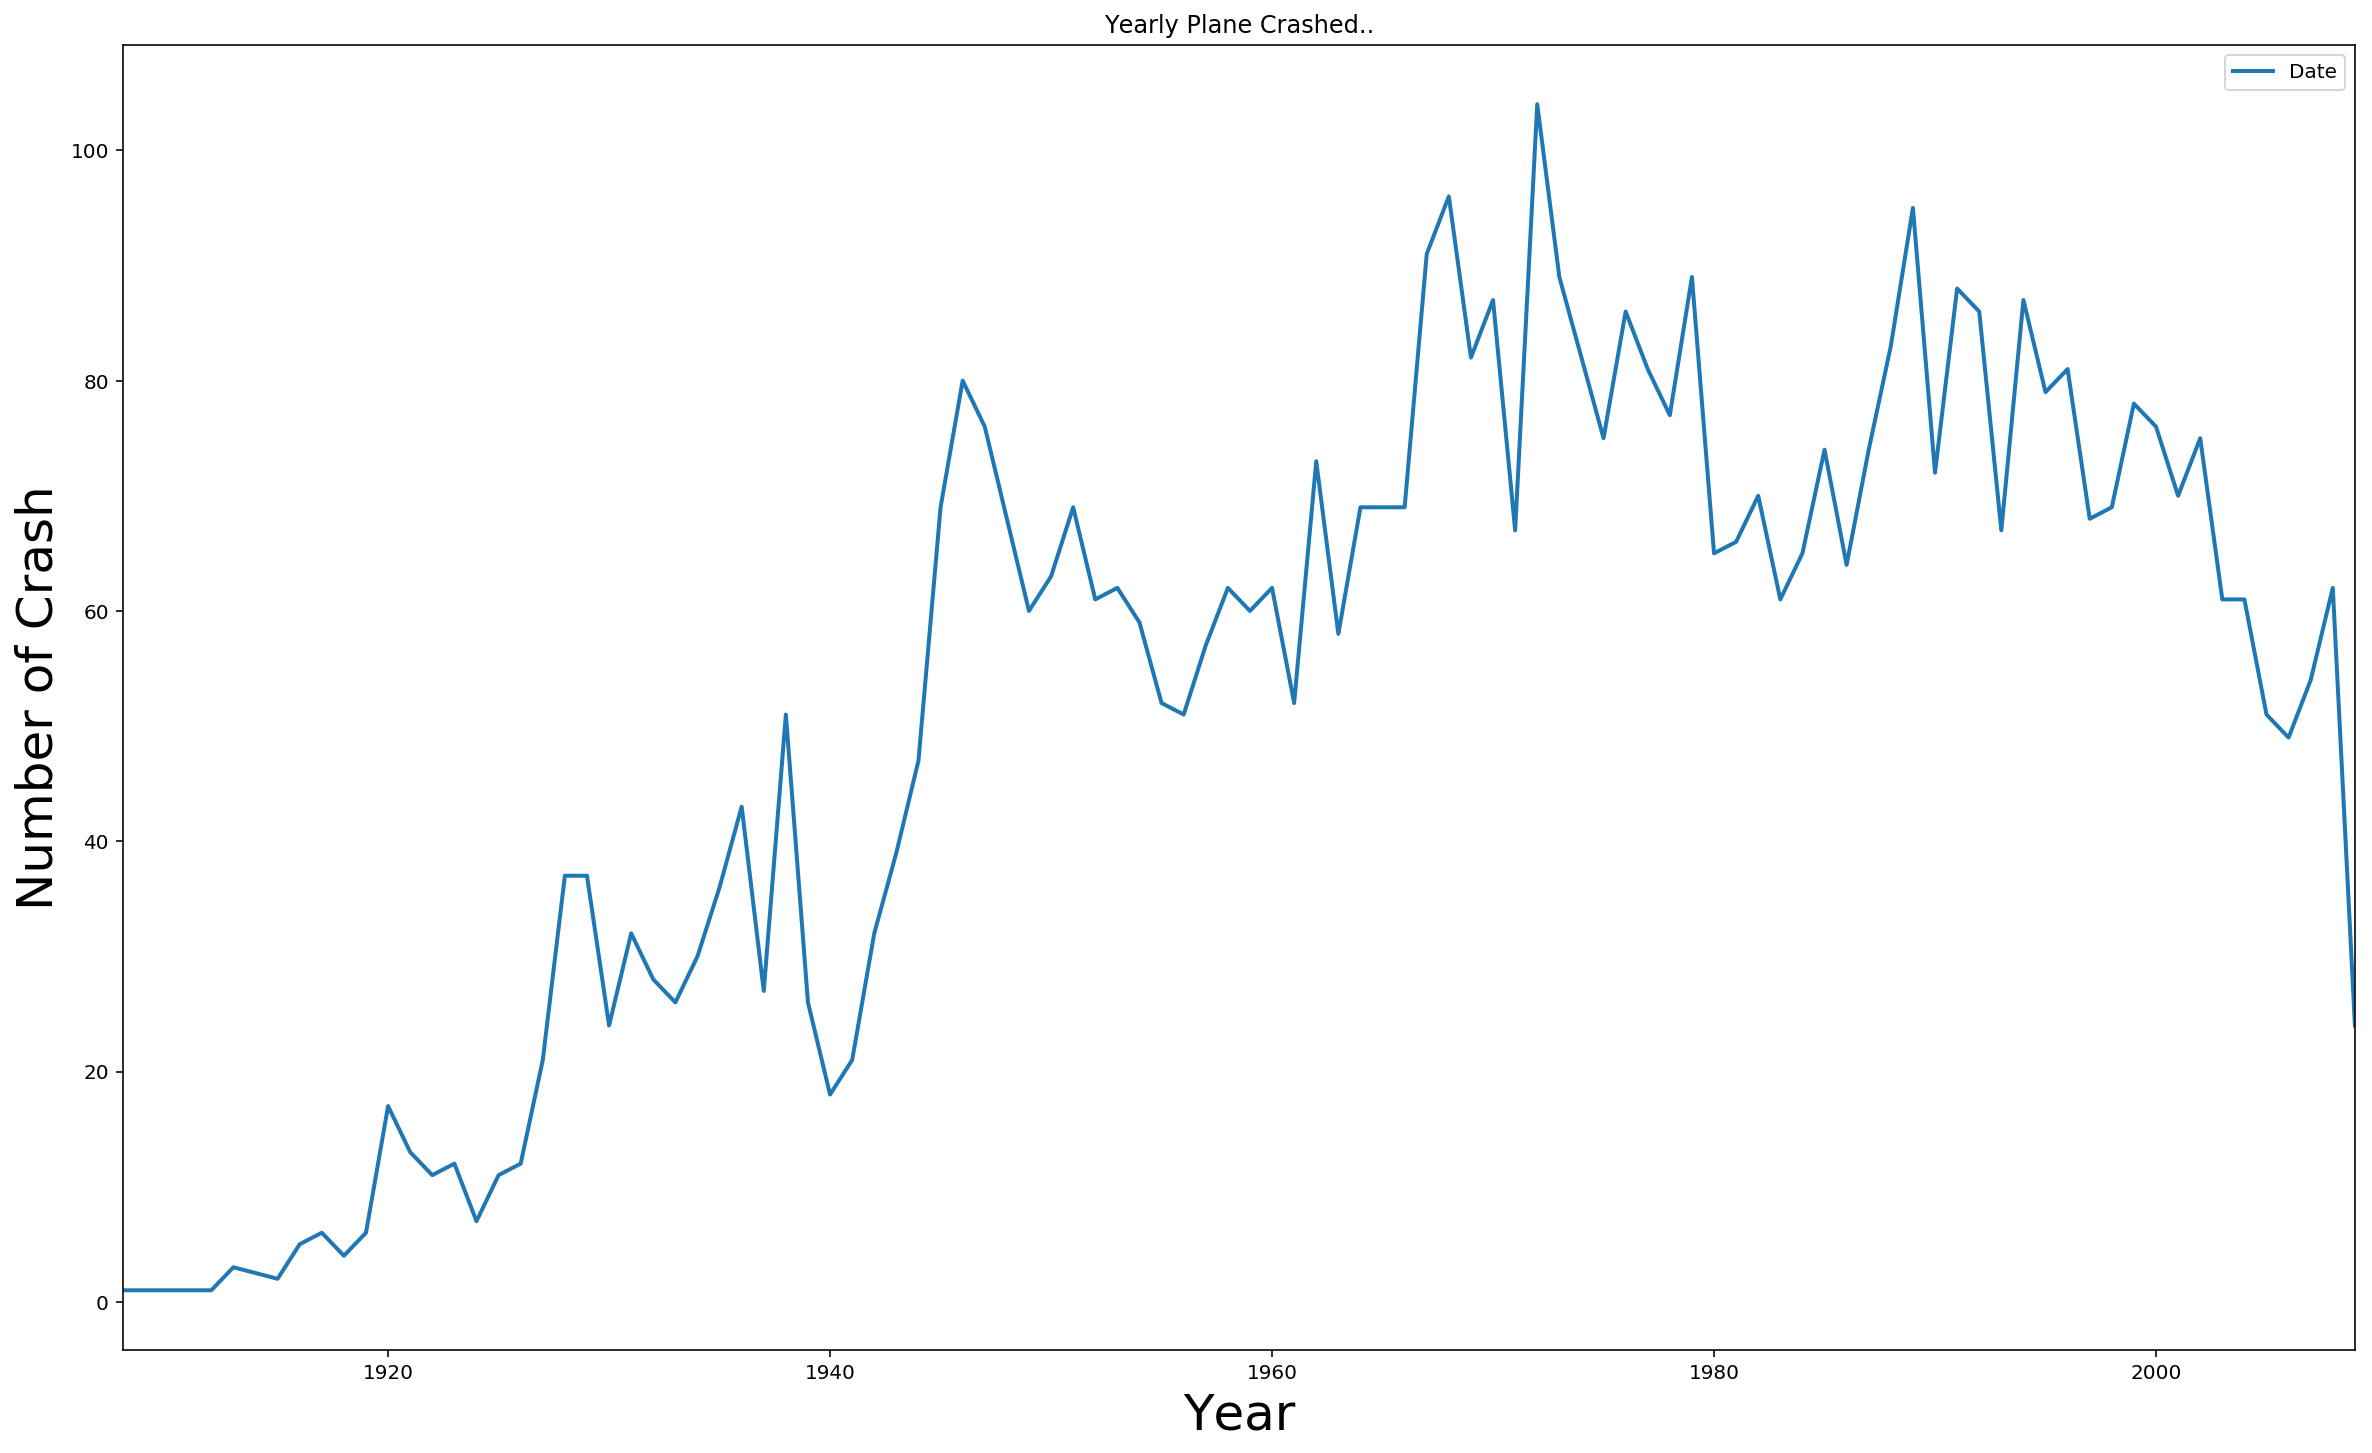

In [125]:
yearlyCrashed = dataset.loc[:, ["Year","Date"]].groupby(['Year']).count()
plot1 = yearlyCrashed.plot(lw=2, title='Yearly Plane Crashed..', figsize=(20,12))
plot1.set_xlabel("Year", fontsize=25)
plot1.set_ylabel("Number of Crash", fontsize=25)

# Yearly Stats for Aboard, Fatalities and Survive 

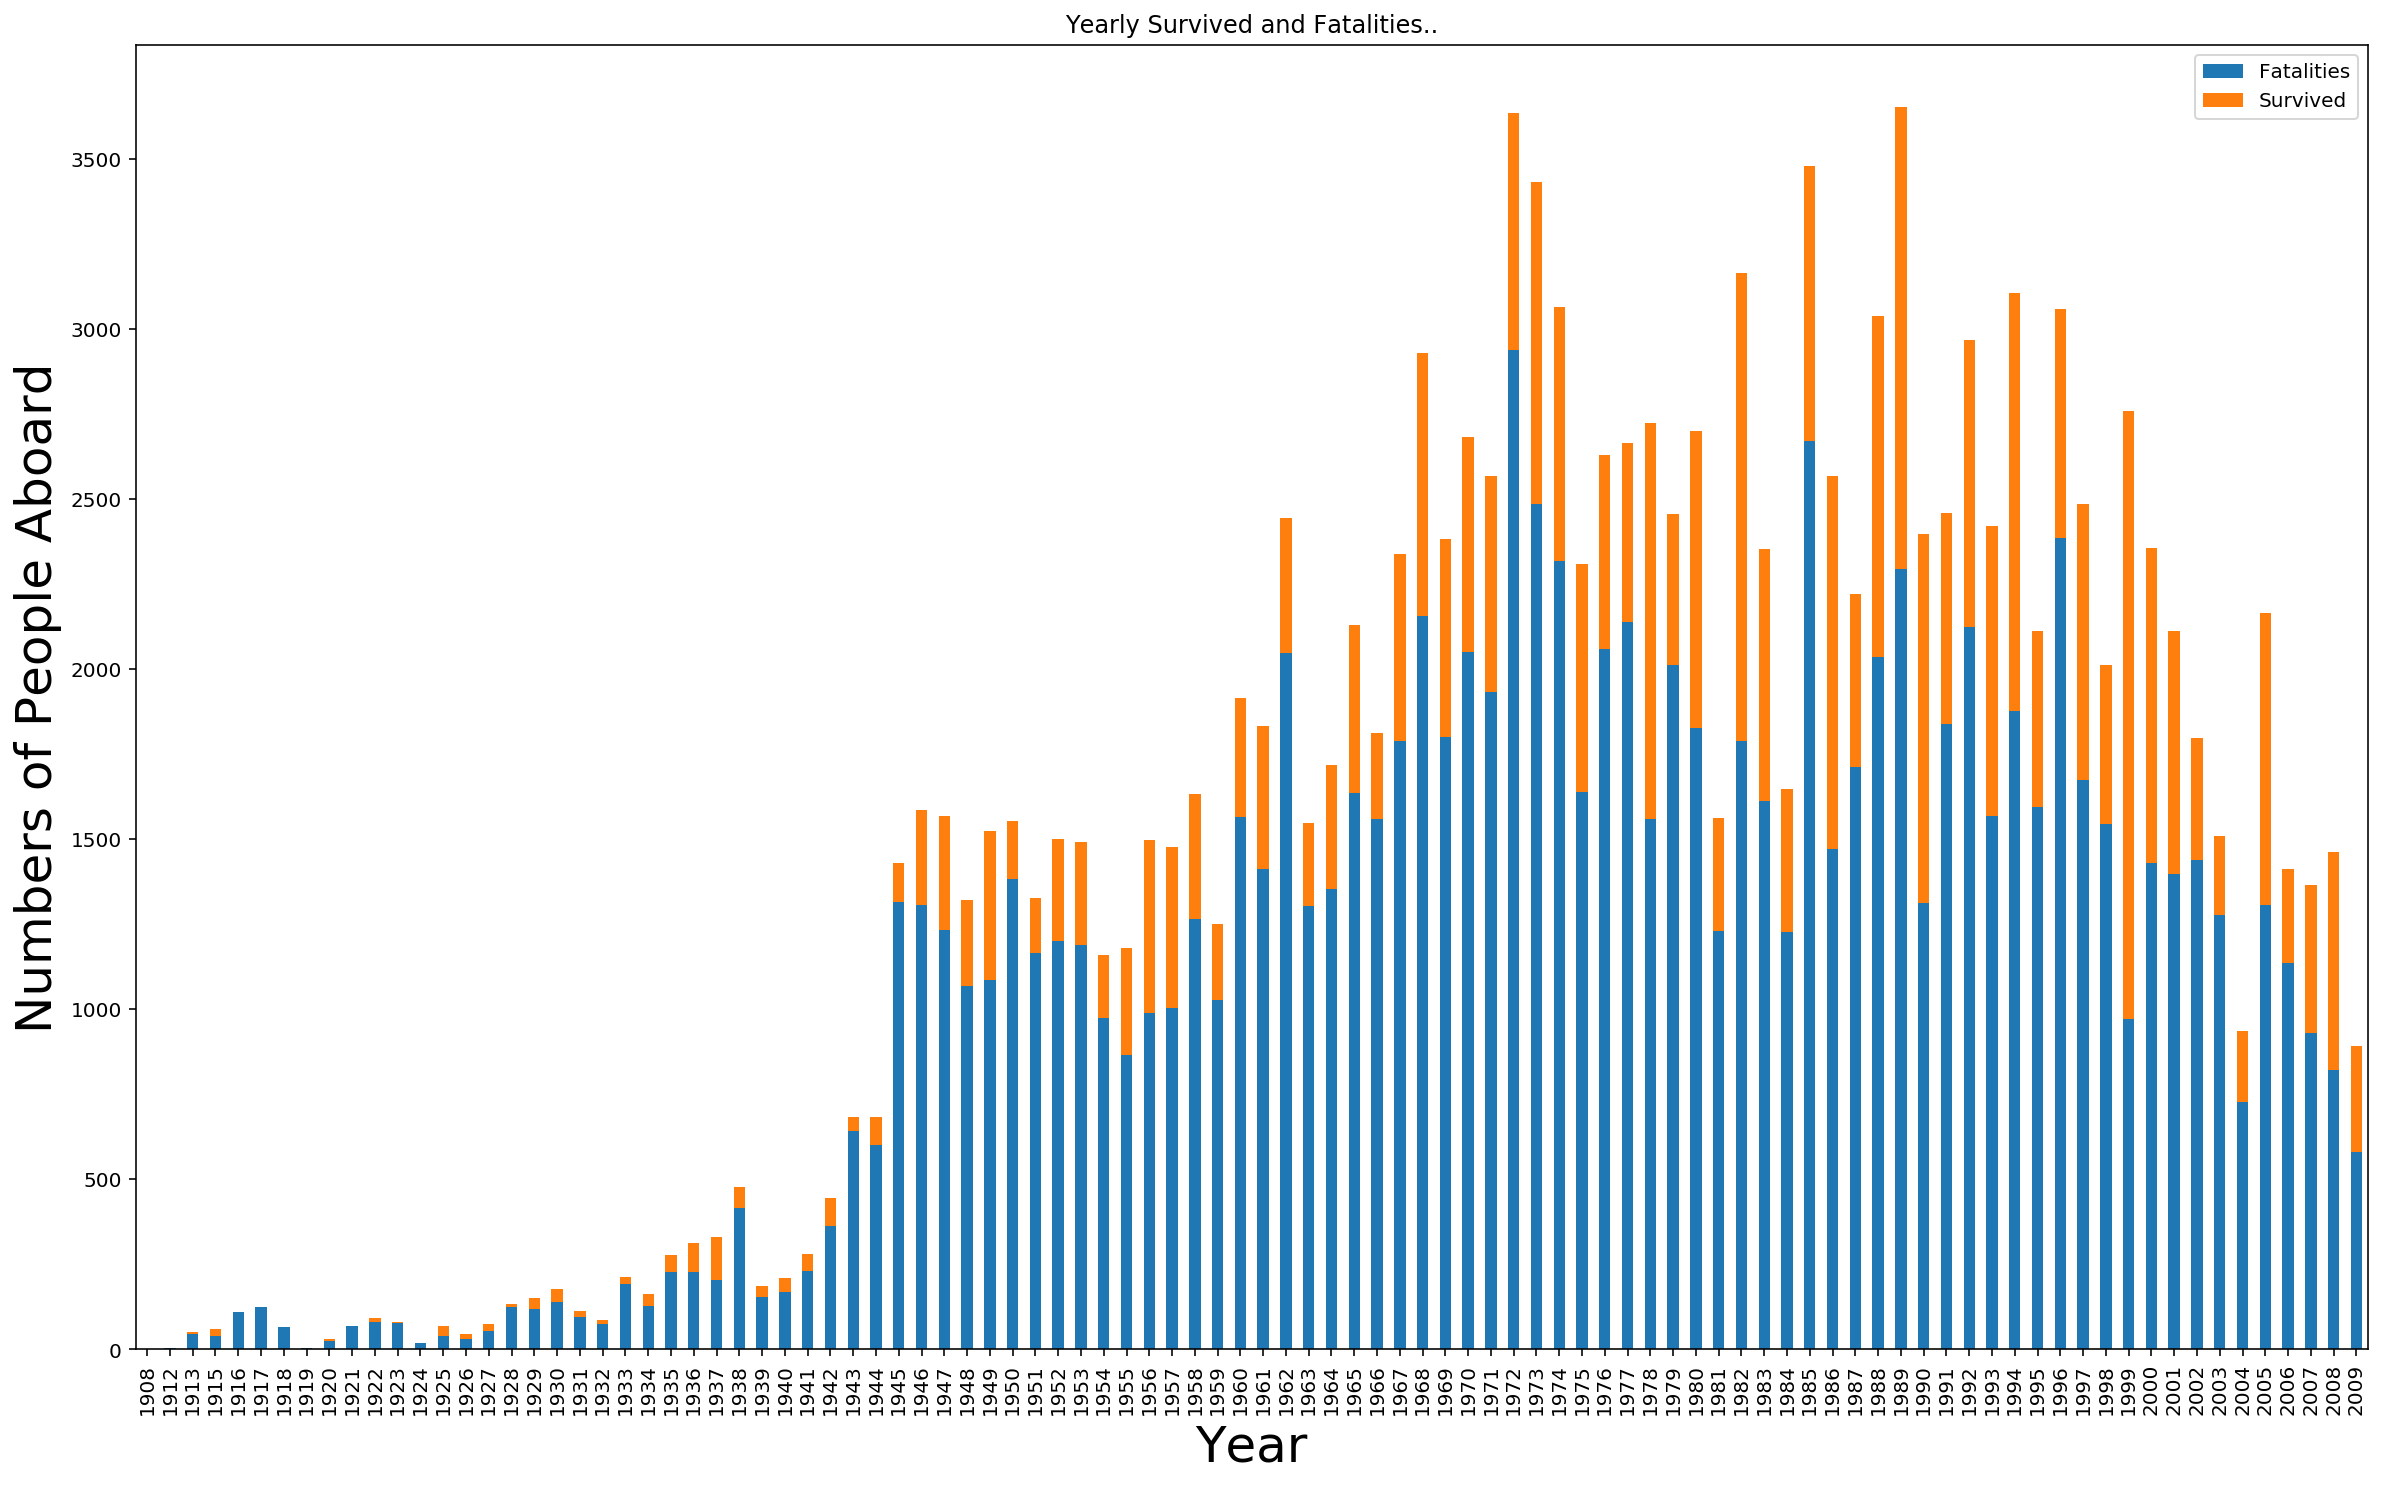

In [126]:
yearlyStats = dataset.loc[:, ["Year","Fatalities", "Survived"]].groupby(['Year']).sum()
plot2 = yearlyStats.plot.bar(stacked=True, title='Yearly Survived and Fatalities..', figsize=(20,12))
plot2.set_xlabel("Year", fontsize=25)
plot2.set_ylabel("Numbers of People Aboard", fontsize=25)

# Airplane Crashed by Operator

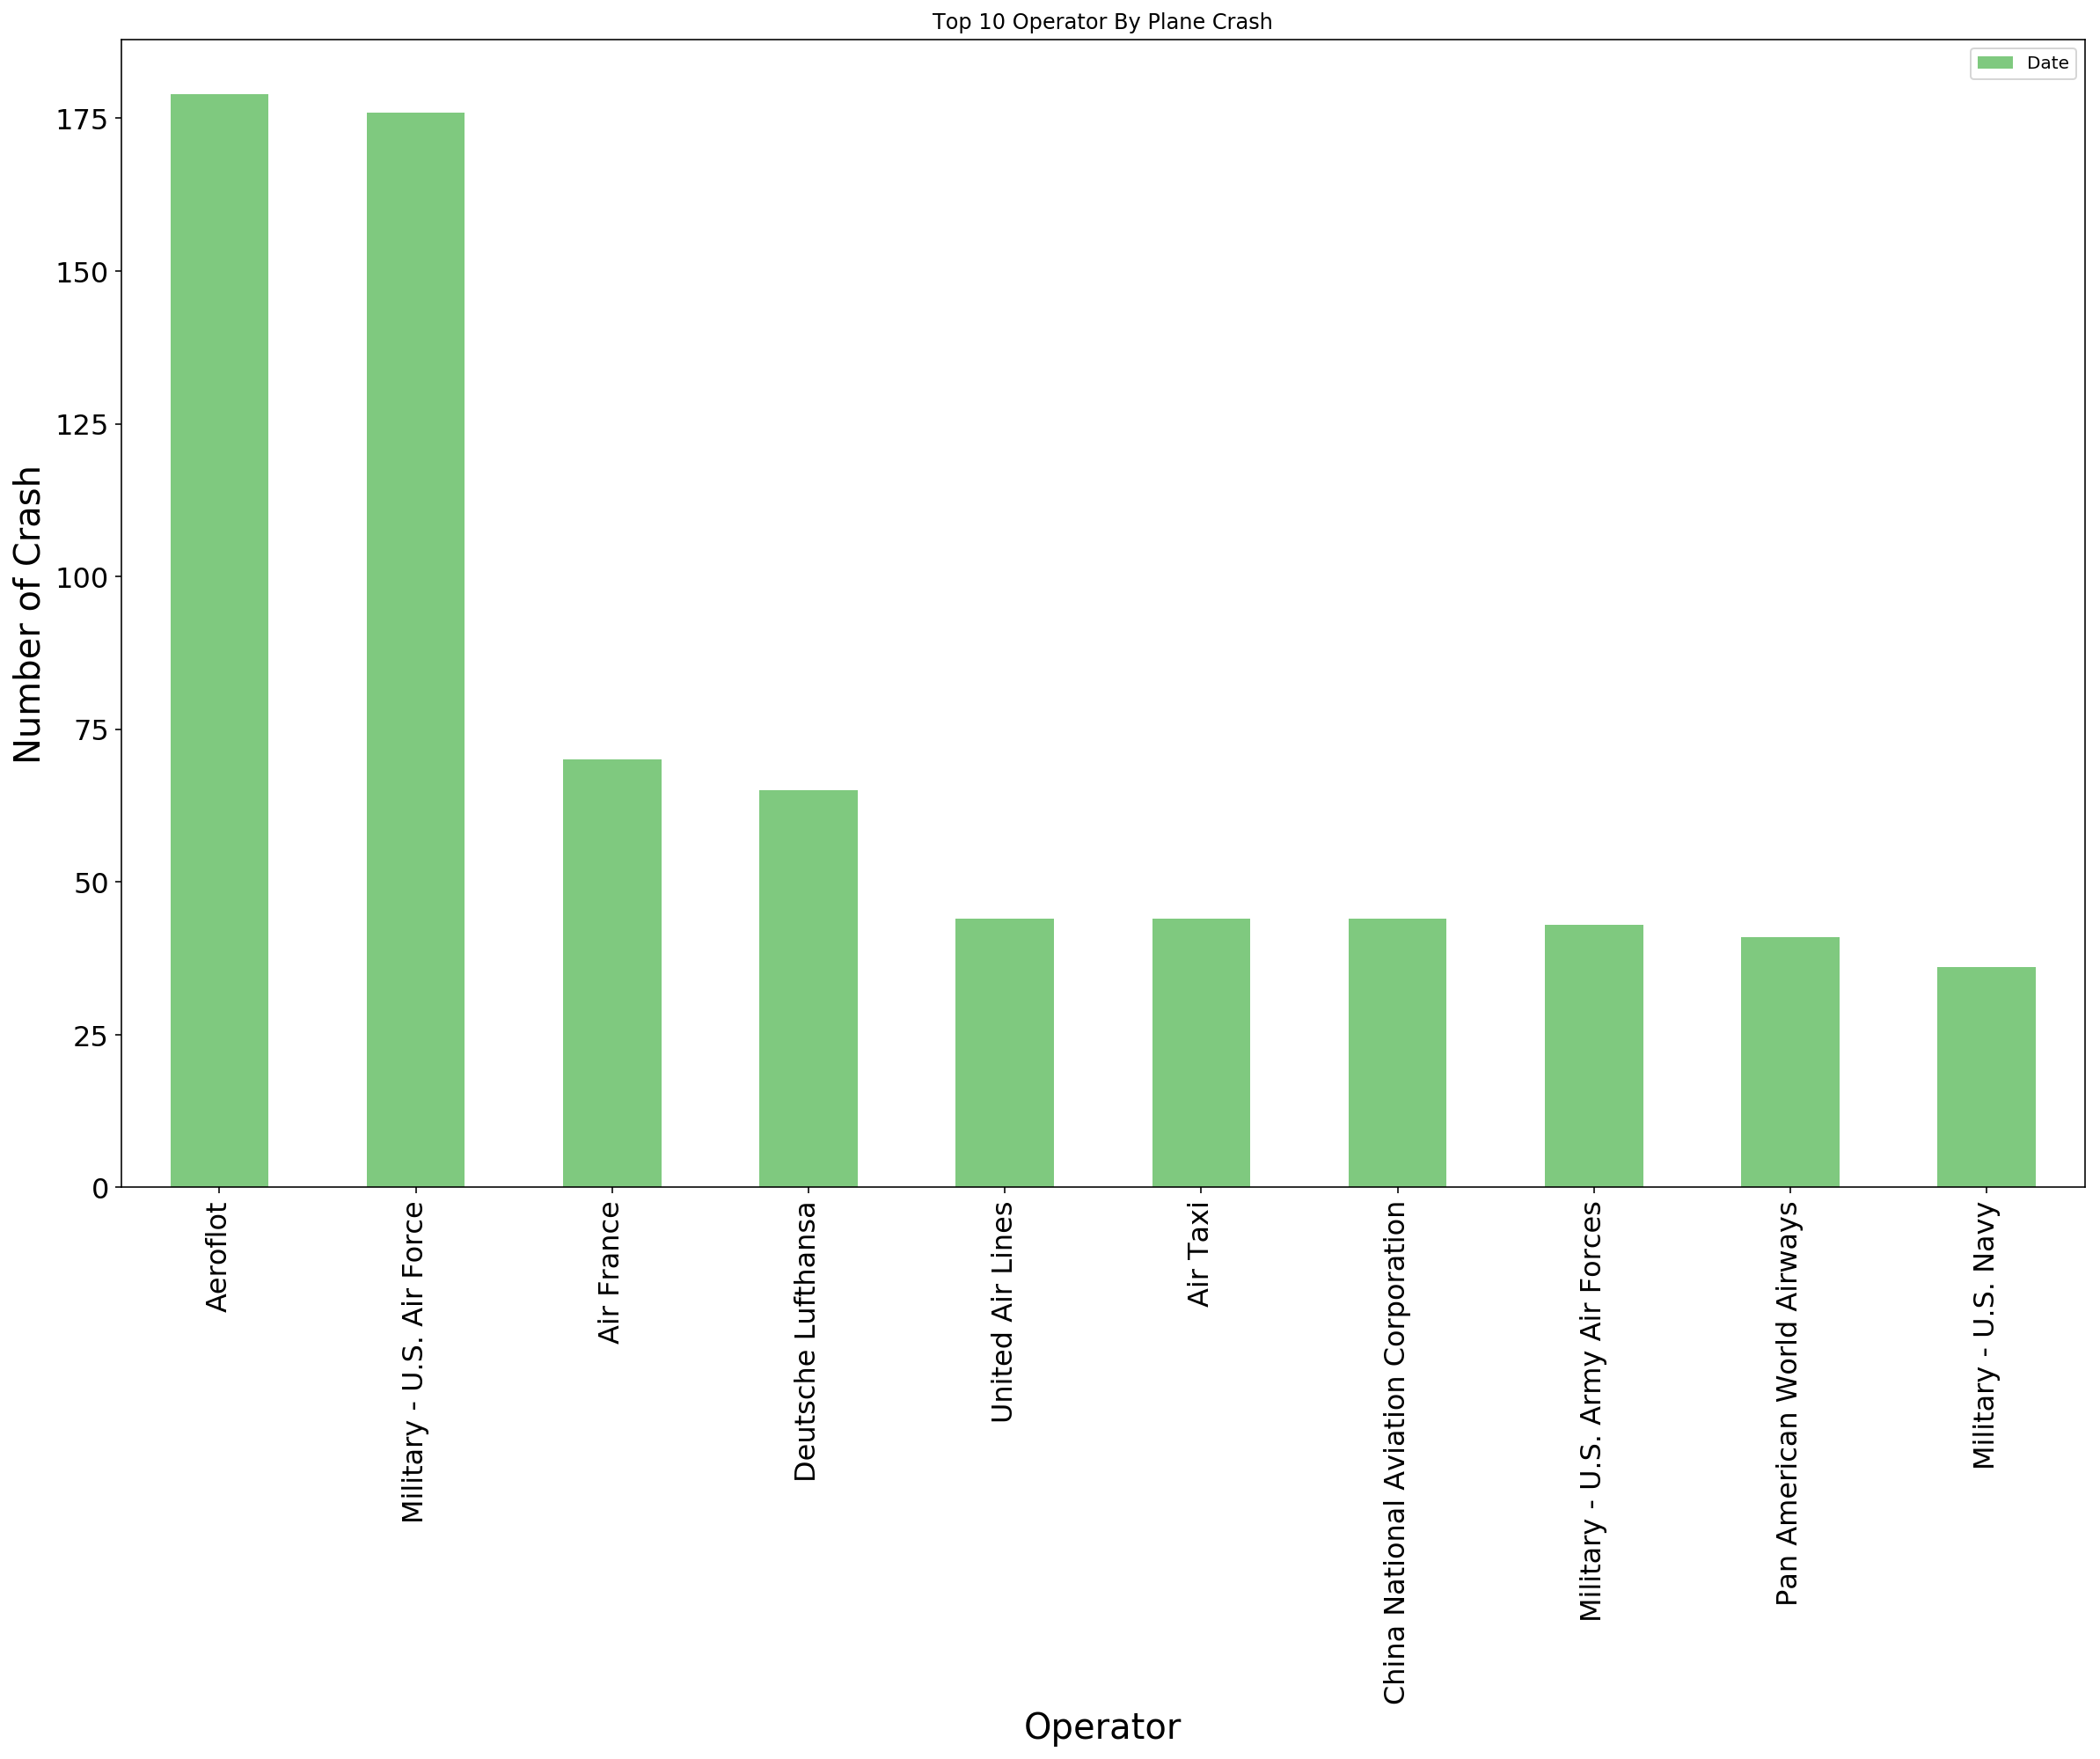

In [127]:
crashedByOperator = dataset.loc[:, ["Operator","Date"]].groupby(['Operator']).count()
crashedByOperator = crashedByOperator.sort_values(by="Date", ascending=False).head(10)
plot3 = crashedByOperator.plot.bar( fontsize=16, colormap='Accent', figsize=(20,12), title="Top 10 Operator By Plane Crash")
plot3.set_xlabel("Operator", fontsize=20,)
plot3.set_ylabel("Number of Crash", fontsize=20,)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x198b42630>], dtype=object)

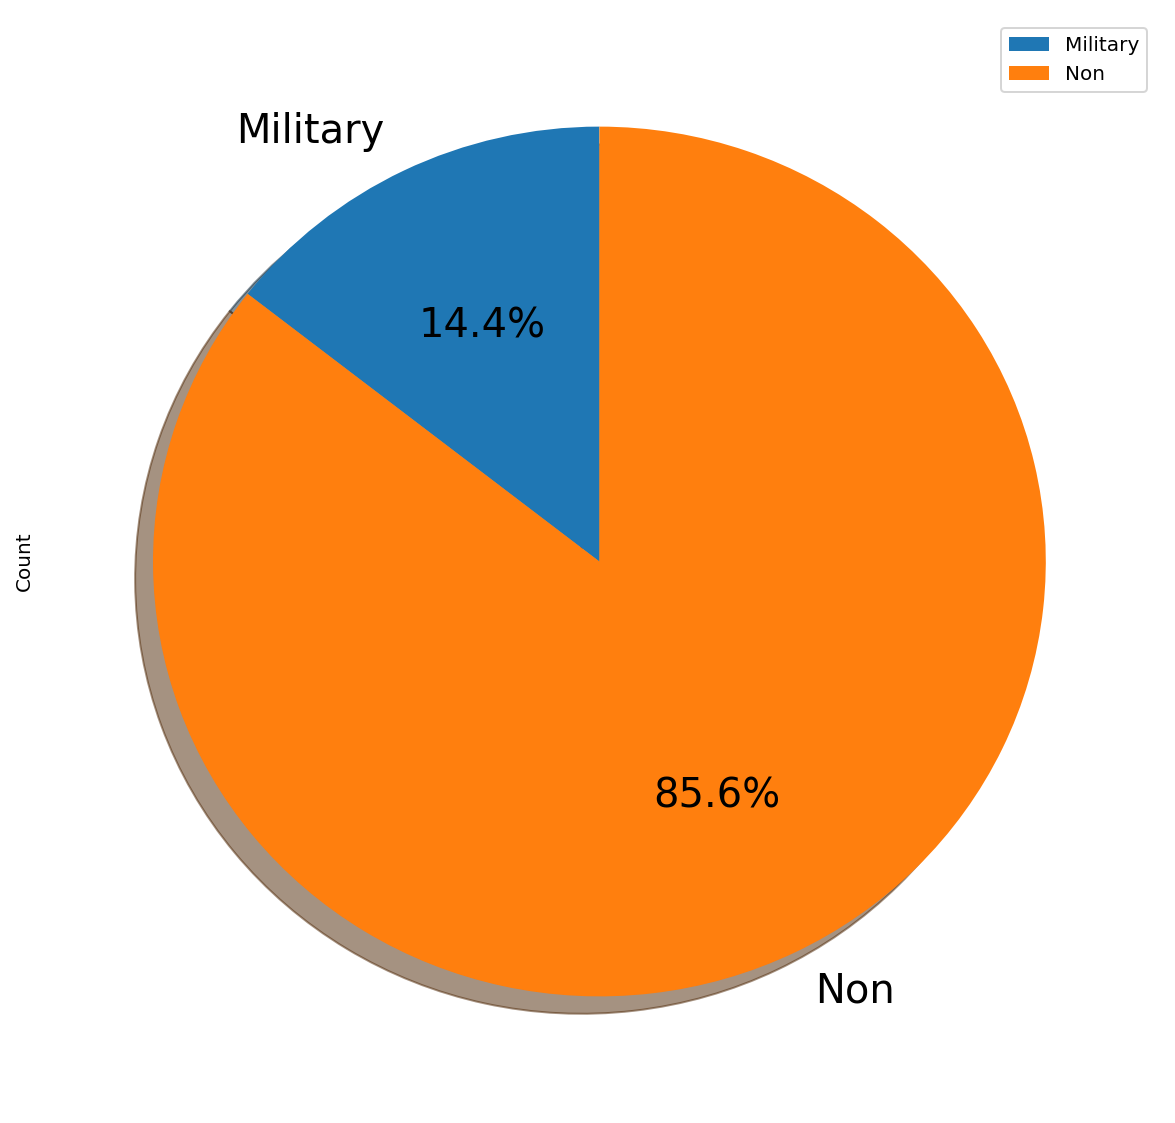

In [128]:
military = dataset['Operator'].dropna().str.lower().str.replace(" ", "").str.split("-")
military = military[military.str.get(0)=='military']
aType = ['Military', 'Non']
values = {}
values['Count'] = [len(military), len(dataset)-len(military)]
operator = pd.DataFrame(values, index=aType)
operator.plot.pie(subplots=True, autopct='%1.1f%%', shadow=True, startangle=90, fontsize=20, figsize=(10, 10))

#    Airplane Crashed by Type of Aircraft

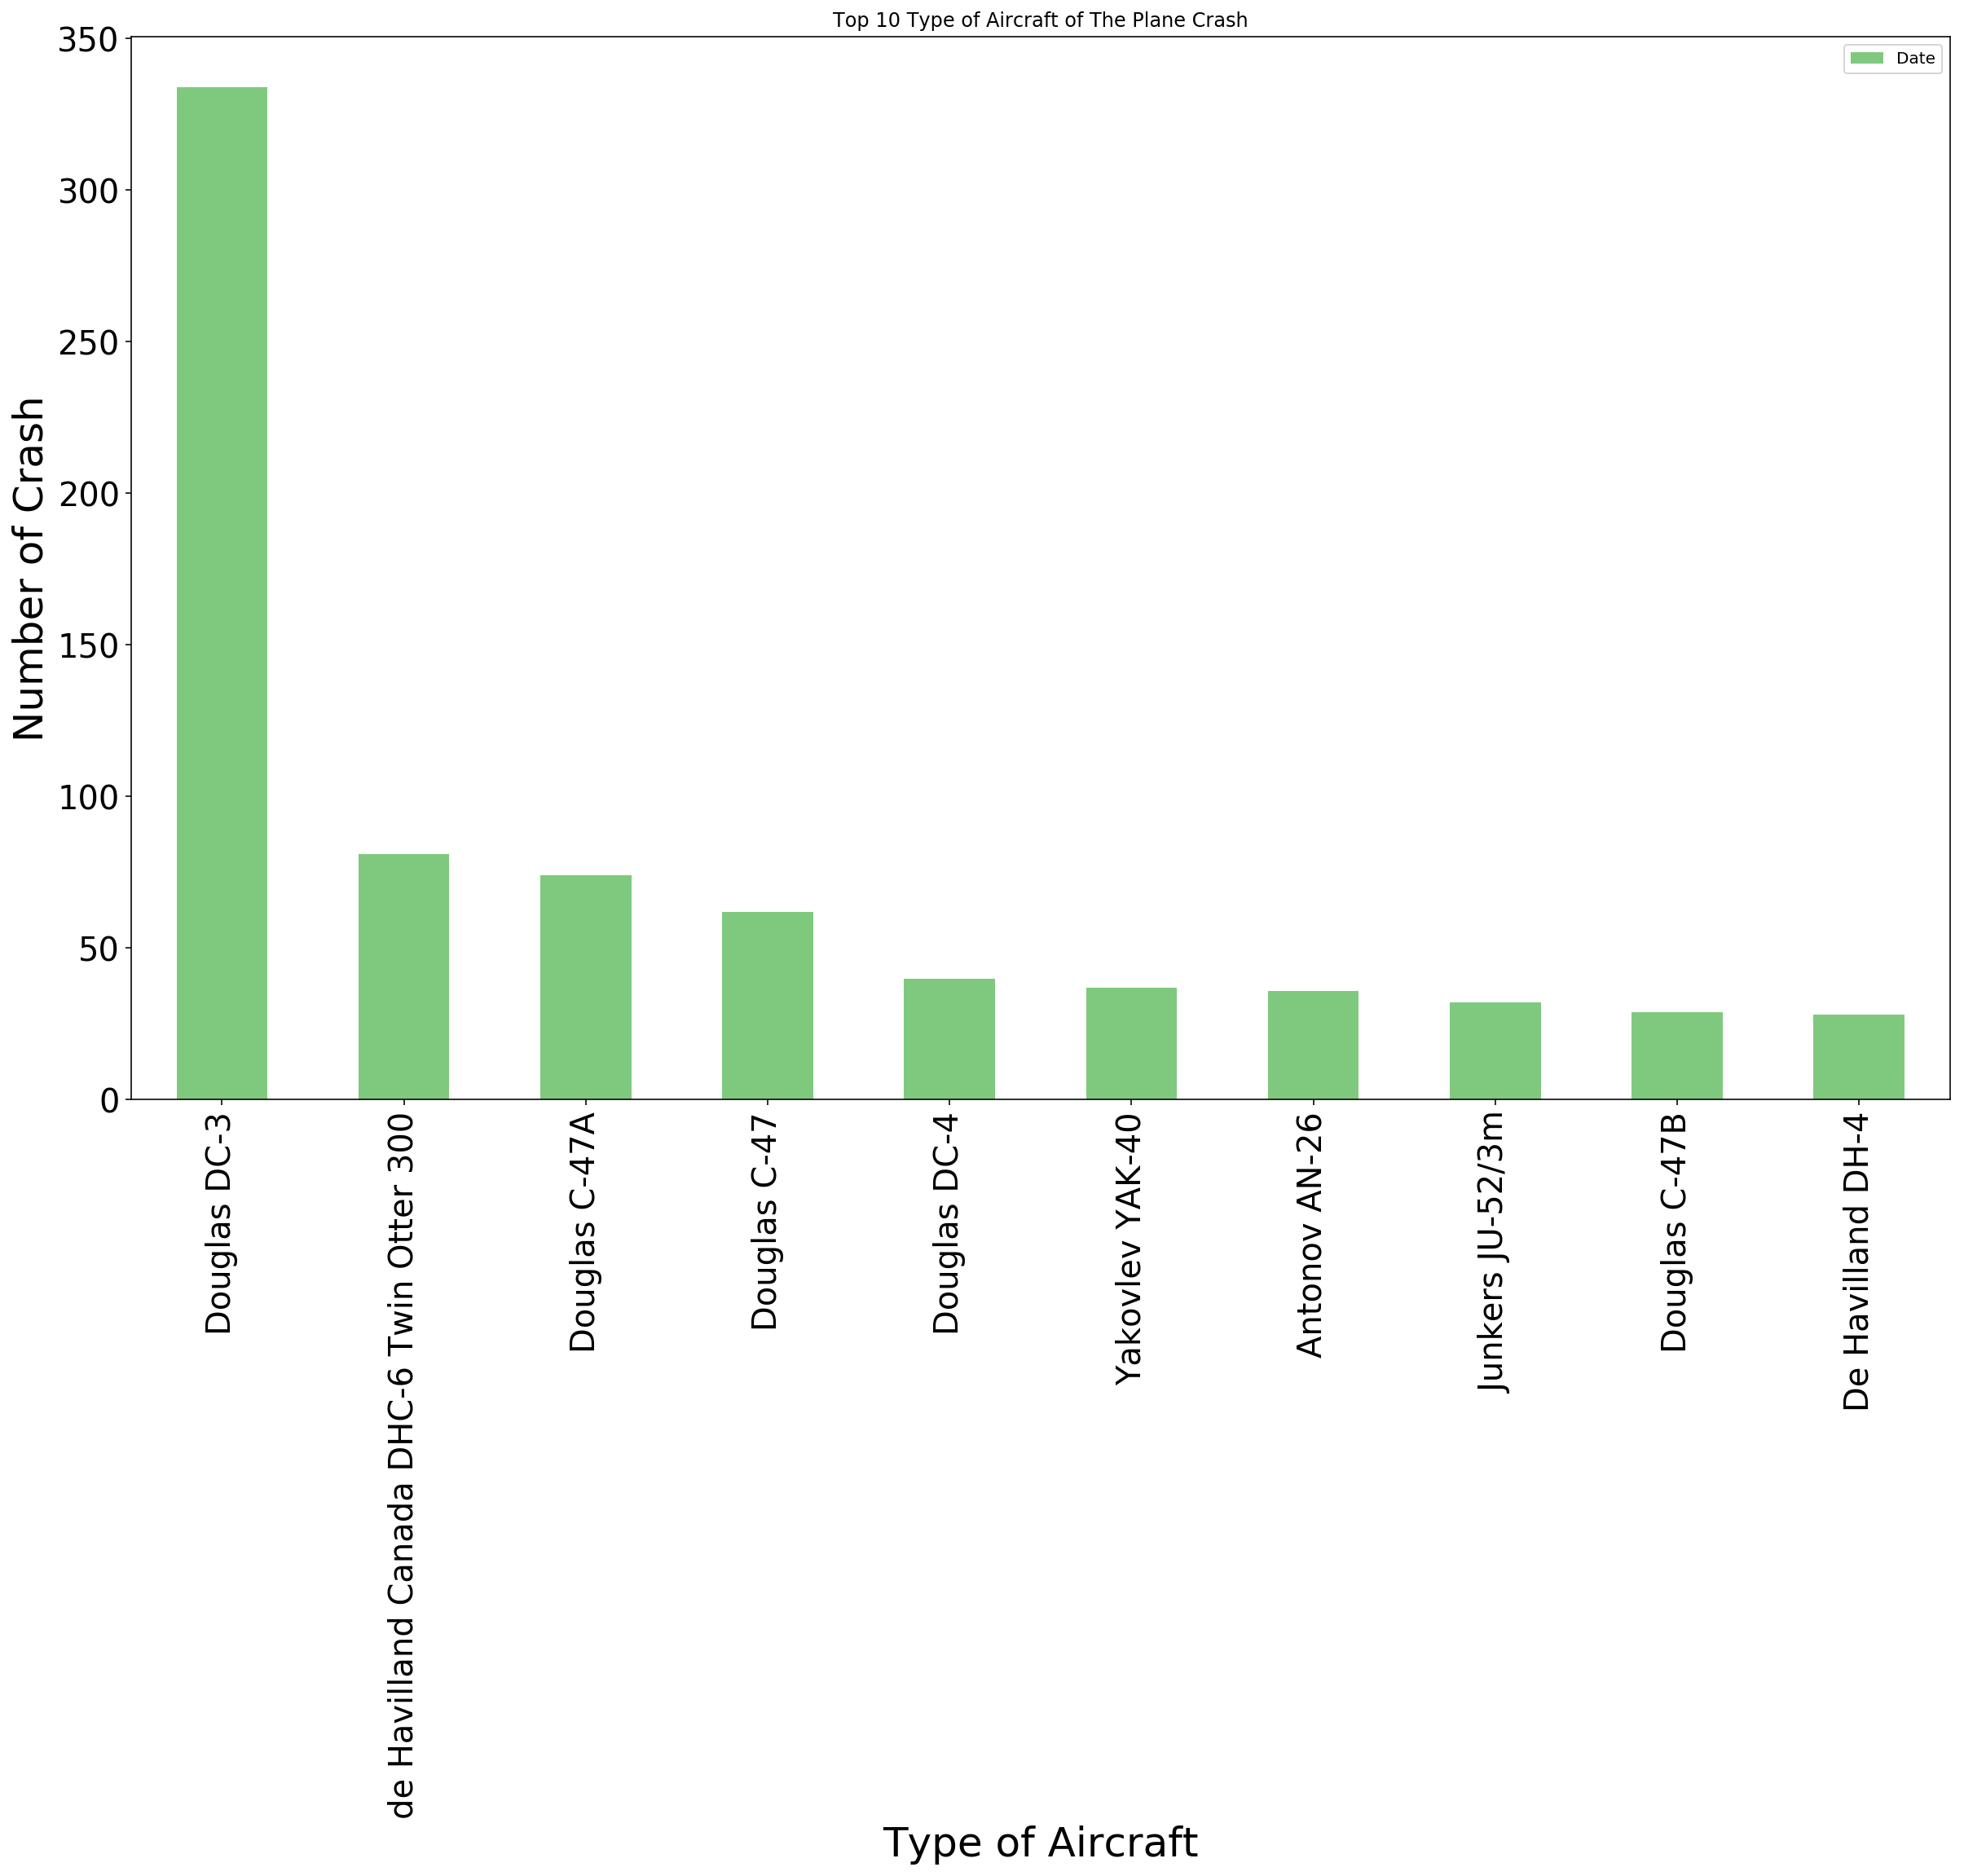

In [129]:
crashedByType = dataset.loc[:, ["Type","Date"]].groupby(['Type']).count()
crashedByType = crashedByType.sort_values(by="Date", ascending=False).head(10)
plot4 = crashedByType.plot.bar(figsize=(20,12), colormap='Accent', 
                               title="Top 10 Type of Aircraft of The Plane Crash", fontsize=20)
plot4.set_xlabel("Type of Aircraft", fontsize=25)
plot4.set_ylabel("Number of Crash", fontsize=25)

# Select and Analyze 200 Random Summary

In [324]:
import random
text = list(dataset["Summary"])
l = len(text)
with open("random-summary.txt", "w") as f:
    for x in range(200):
        n = random.randint(0,l-1)
        f.write(str(text[n]))
        f.write("\n")

# Word Frequency Analysis

In [259]:
import textblob
stringText = textblob.TextBlob(str(list(dataset["Summary"]))).lower()
words = stringText.words

In [327]:
wordCount = {}
ignore = ['a', 'an', 'the', "'the", 'and', 'to', 'of', 'in', 'into', 'is', 'was', 'on', 'at', 'from', 'with',
          'while', 'for', "'s", 'as', 'not', 'by', 'after', 'during']

for word in words:
    if word in ignore:
        continue
    if word in wordCount:
        wordCount[word] = wordCount[word] + 1
    else:
        wordCount[word] = 1

In [329]:
import operator
sorted_word = sorted(wordCount.items(), key=operator.itemgetter(1), reverse=True)[:500]
with open("sorted-word-count.txt", "w") as f:
    f.write(str(sorted_word))

## Selecting 6 Major Reasons of Airplane Crash After through analysis of random-sorted.txt and word frequency

In [7]:
reasons = ['weather', 'fire', 'shot down', 'stall/runway', 'pilot/crew error', 'systems failure']

In [8]:
expresion = ['((poor|bad).*(weather|visibility)|thunderstorm|fog)','(caught fire)|(caught on fire)', 
           '(shot down) | (terrorist) | (terrorism)', '(stall)|(runway)', '(pilot|crew) (error|fatigue)',
            '(engine.*(fire|fail))|(structural fail)|(fuel leak)|(langing gear)|(turbulence)|(electrical)|(out of fuel)|(fuel.*exhaust)']

# Add One More New Column Label(Classification)

In [130]:
dataset['Label'] = pd.Series(np.nan, index=dataset.index)
dataset.head(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Label
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0,NaN


# Create Train Dataset

In [23]:
trainData = []
for x in range(len(dataset)):
    if dataset.loc[x,"Summary"] is np.nan:
        dataset.loc[x,"Label"] = "unknown"
    else:
        for y in range(len(expresion)):
            if re.search(expresion[y], dataset.loc[x,"Summary"].lower()):
                dataset.loc[x,"Label"] = reasons[y]
                temp = dataset.loc[x,"Summary"].lower(), dataset.loc[x,"Label"]
                trainData.append(temp)
                break

In [89]:
len(trainData)

2222

# Build Naive Bayes Classifier

In [29]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(trainData)

# Classify Rest of the Dataset

In [131]:
reasons.append("unknown")
for x in range(30,len(dataset)):
    if dataset.loc[x,"Label"] in reasons:
       continue
    else:
        dataset.loc[x,"Label"] = cl.classify(dataset.loc[x,"Summary"])
        
# dataset = pd.read_csv("Airplane_Crashes_Updated.csv")
# dataset.to_csv("Airplane_Crashes_Updated.csv")

# Airplane Crashed by Label

array([<matplotlib.axes._subplots.AxesSubplot object at 0x19b9fedd8>], dtype=object)

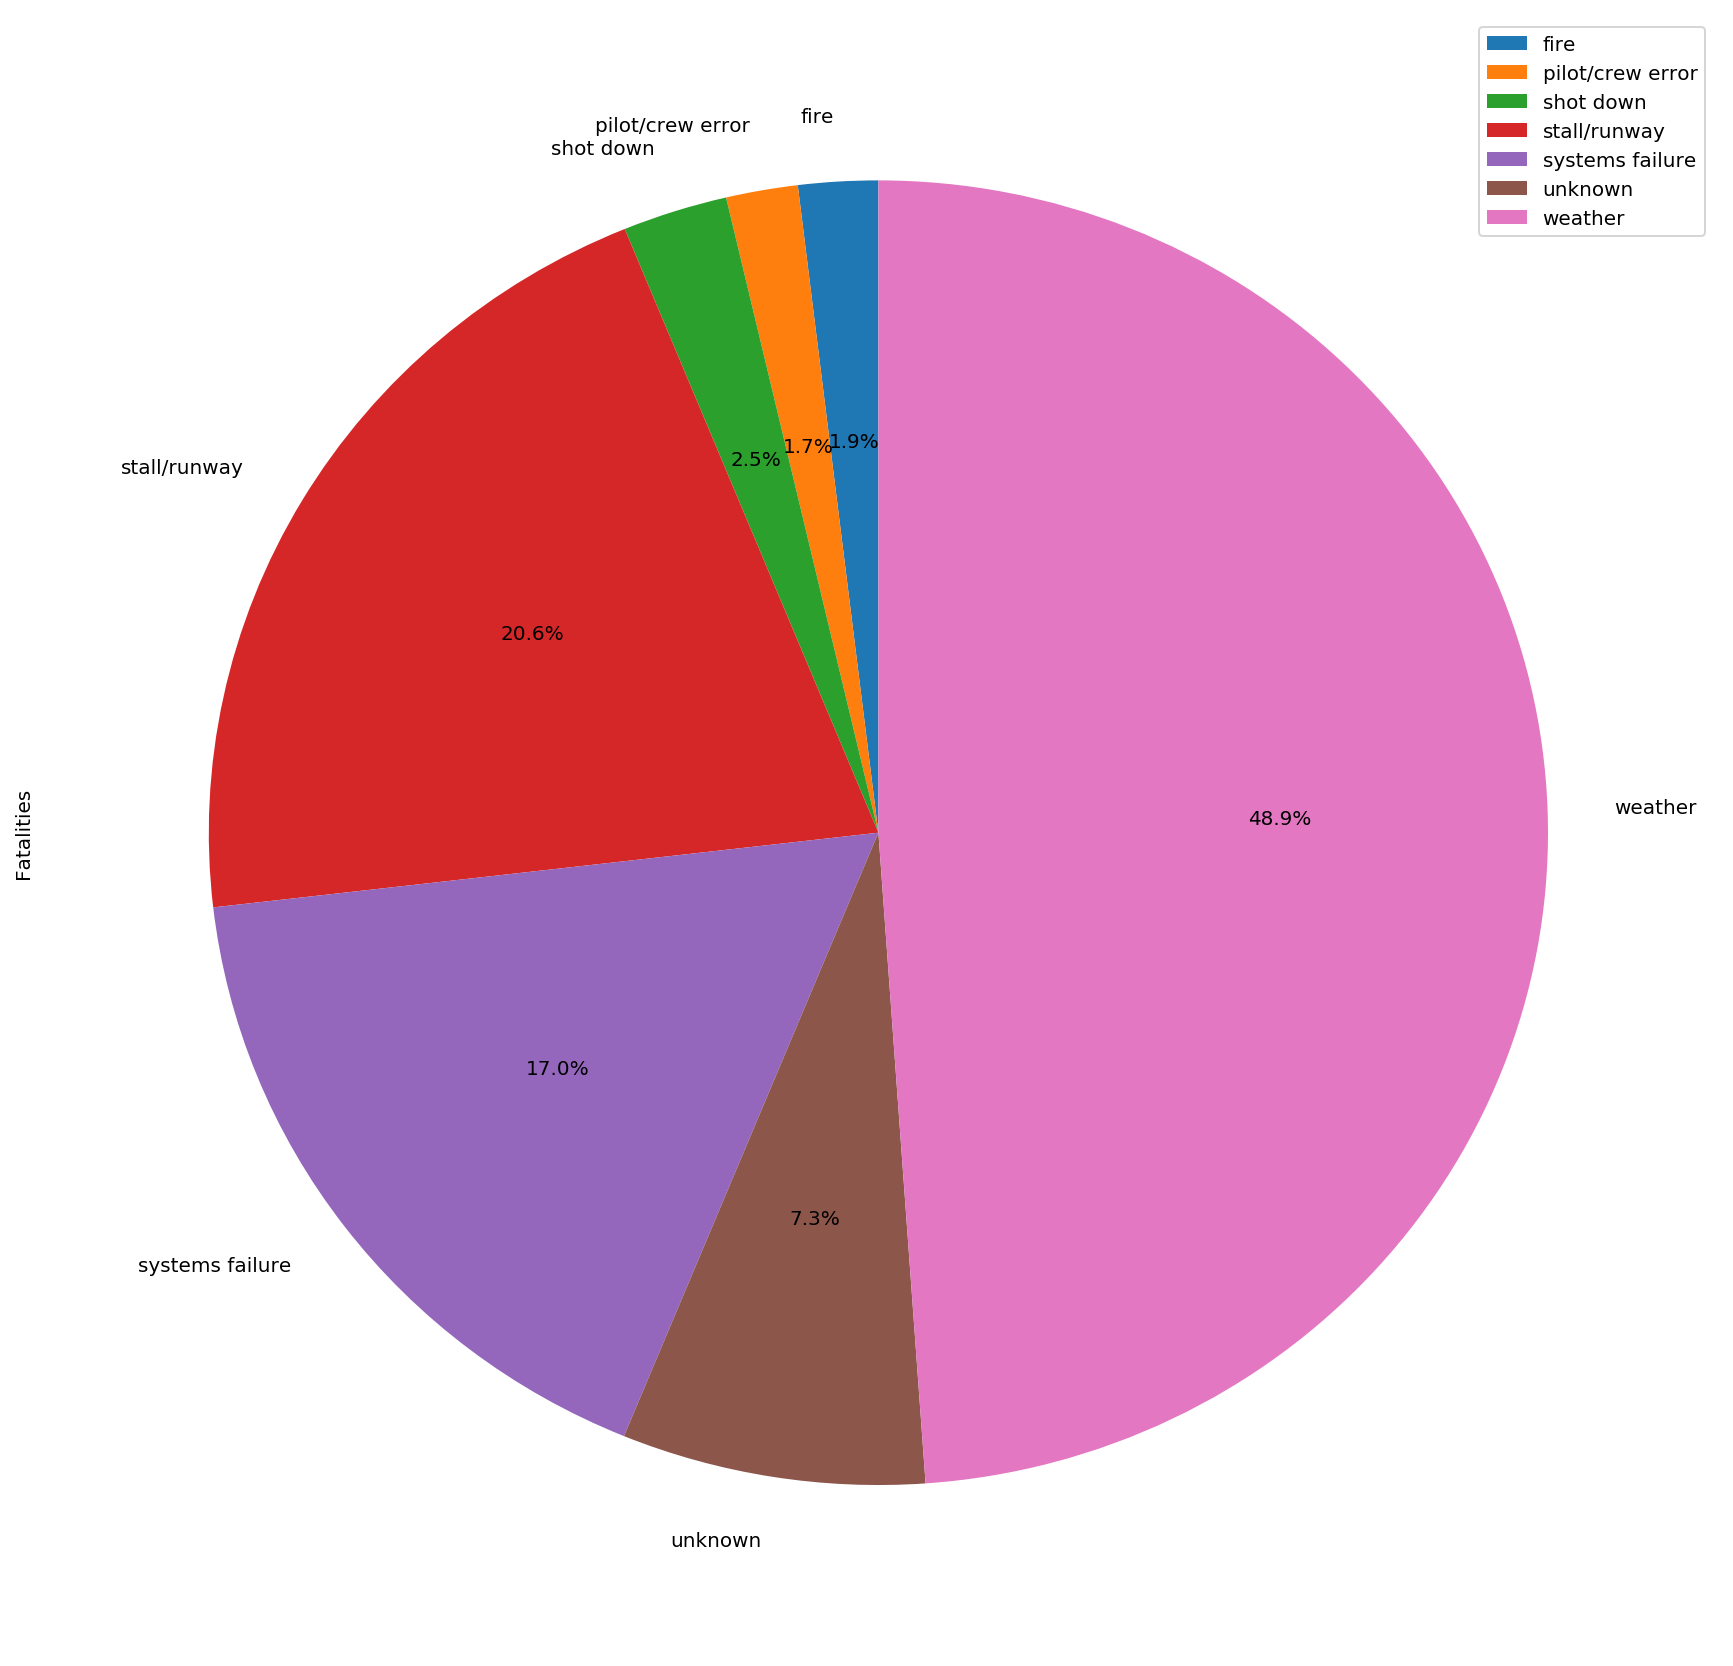

In [132]:
label = dataset.loc[:,["Fatalities","Label"]].groupby("Label").count()
label.plot.pie(subplots=True, autopct='%1.1f%%', shadow=False, startangle=90, fontsize=10, figsize=(15, 15))

# Fatalities by Label

array([<matplotlib.axes._subplots.AxesSubplot object at 0x19ba086a0>], dtype=object)

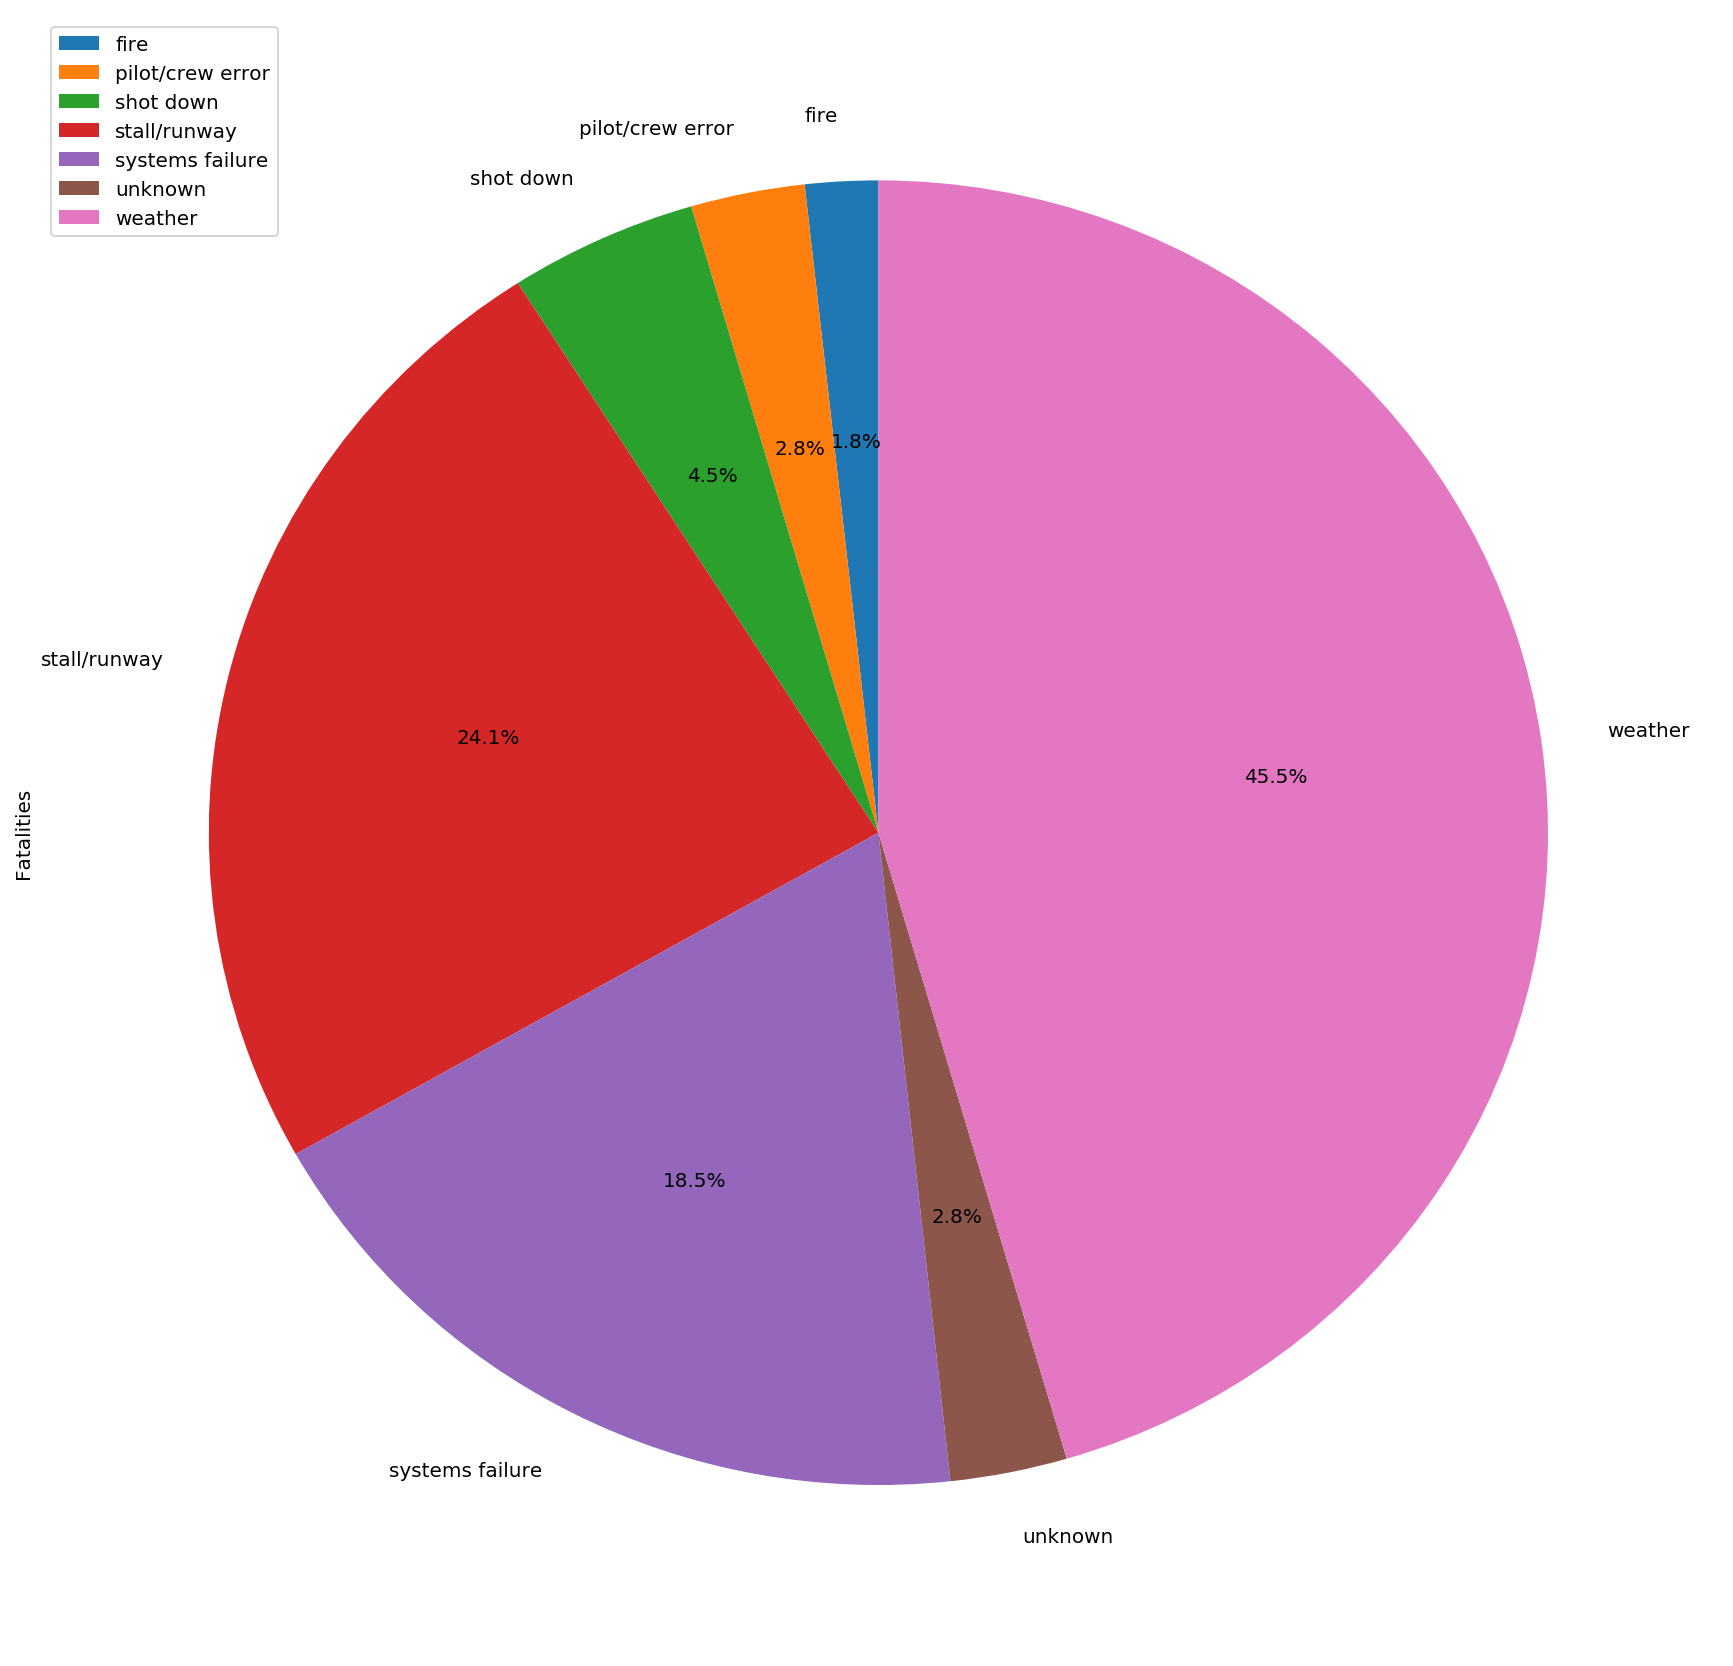

In [133]:
deathByLabel = dataset.loc[:,["Fatalities","Label"]].groupby("Label").sum()
deathByLabel.plot.pie(subplots=True, autopct='%1.1f%%', shadow=False, startangle=90, fontsize=10, figsize=(15, 15))

# Analysis of Routes

In [134]:
routes=dataset['Route']
routes=routes.dropna().str.lower().str.replace(" ", "").str.split("-")
routes=routes[routes.str.len()==2]
dept2Dest=pd.DataFrame({'Departure': routes.str.get(0), 'Destination': routes.str.get(1)})

# Most Dangerous City for Departure

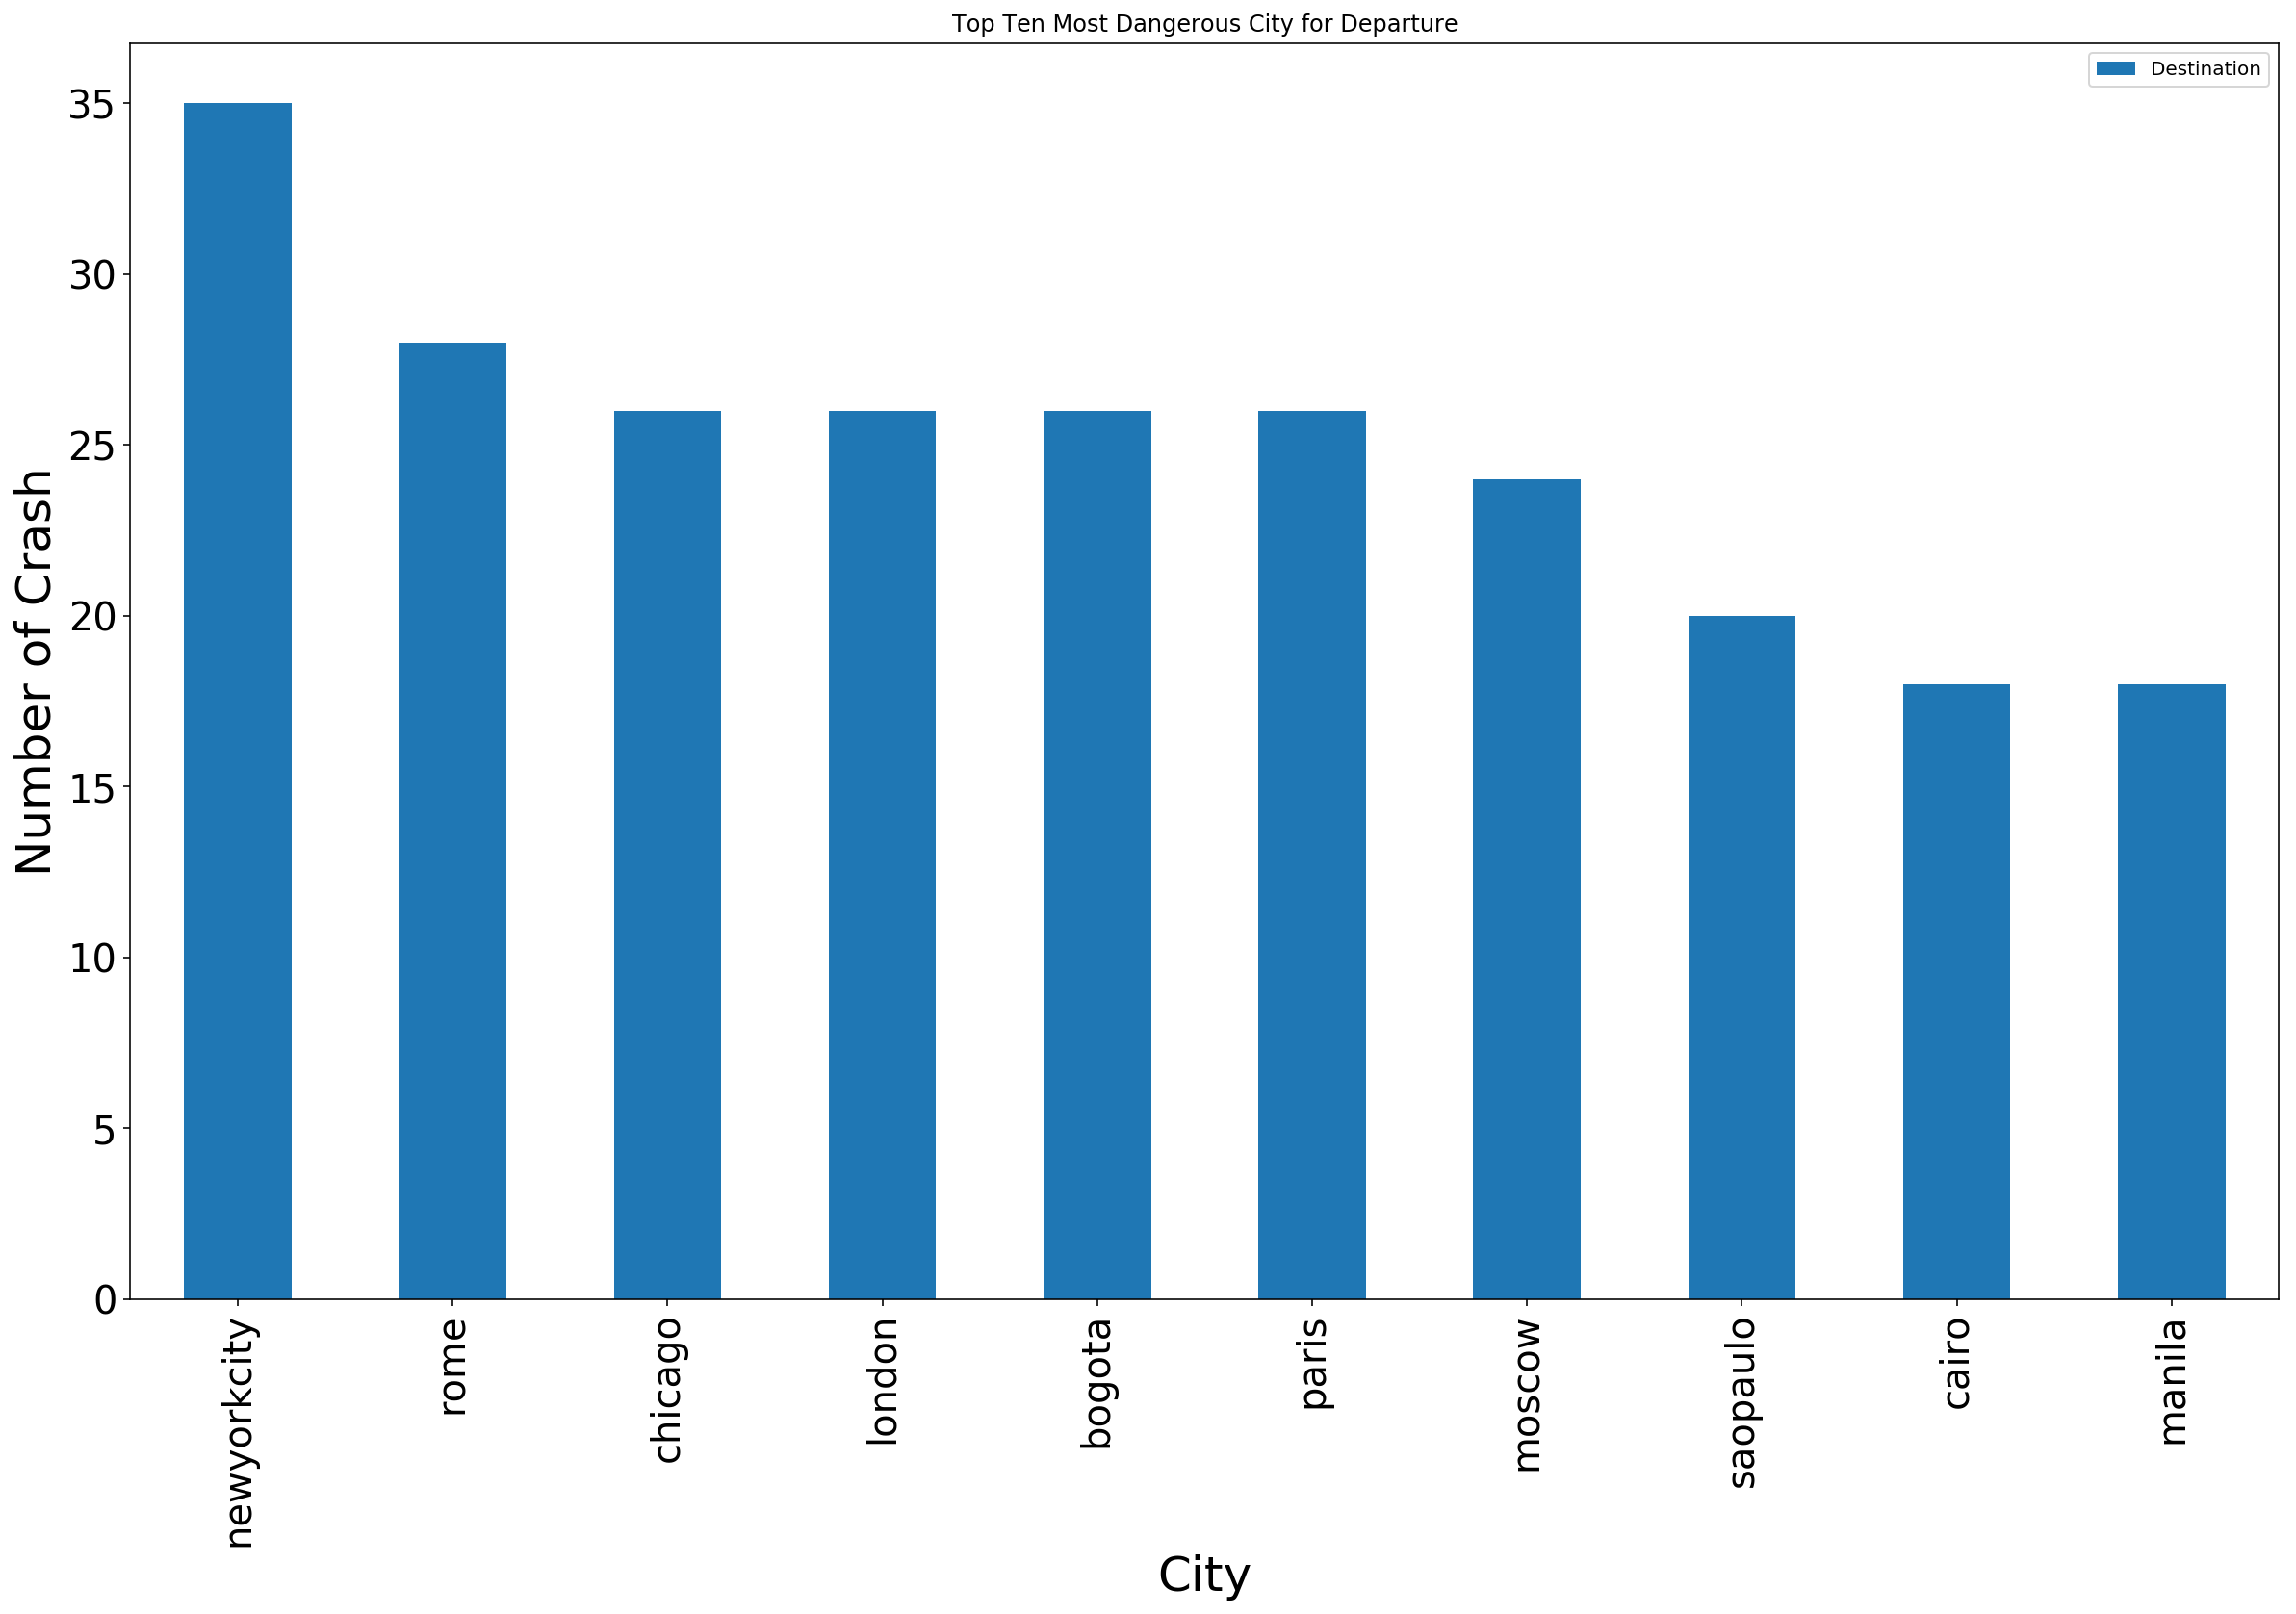

In [135]:
departure = dept2Dest.groupby(['Departure']).count().sort_values(by="Destination", ascending=False).head(10)
plot8 = departure.plot.bar(figsize=(20,12), title="Top Ten Most Dangerous City for Departure", fontsize=20)
plot8.set_xlabel("City", fontsize=25)
plot8.set_ylabel("Number of Crash", fontsize=25)

# Most Dangerous Destination

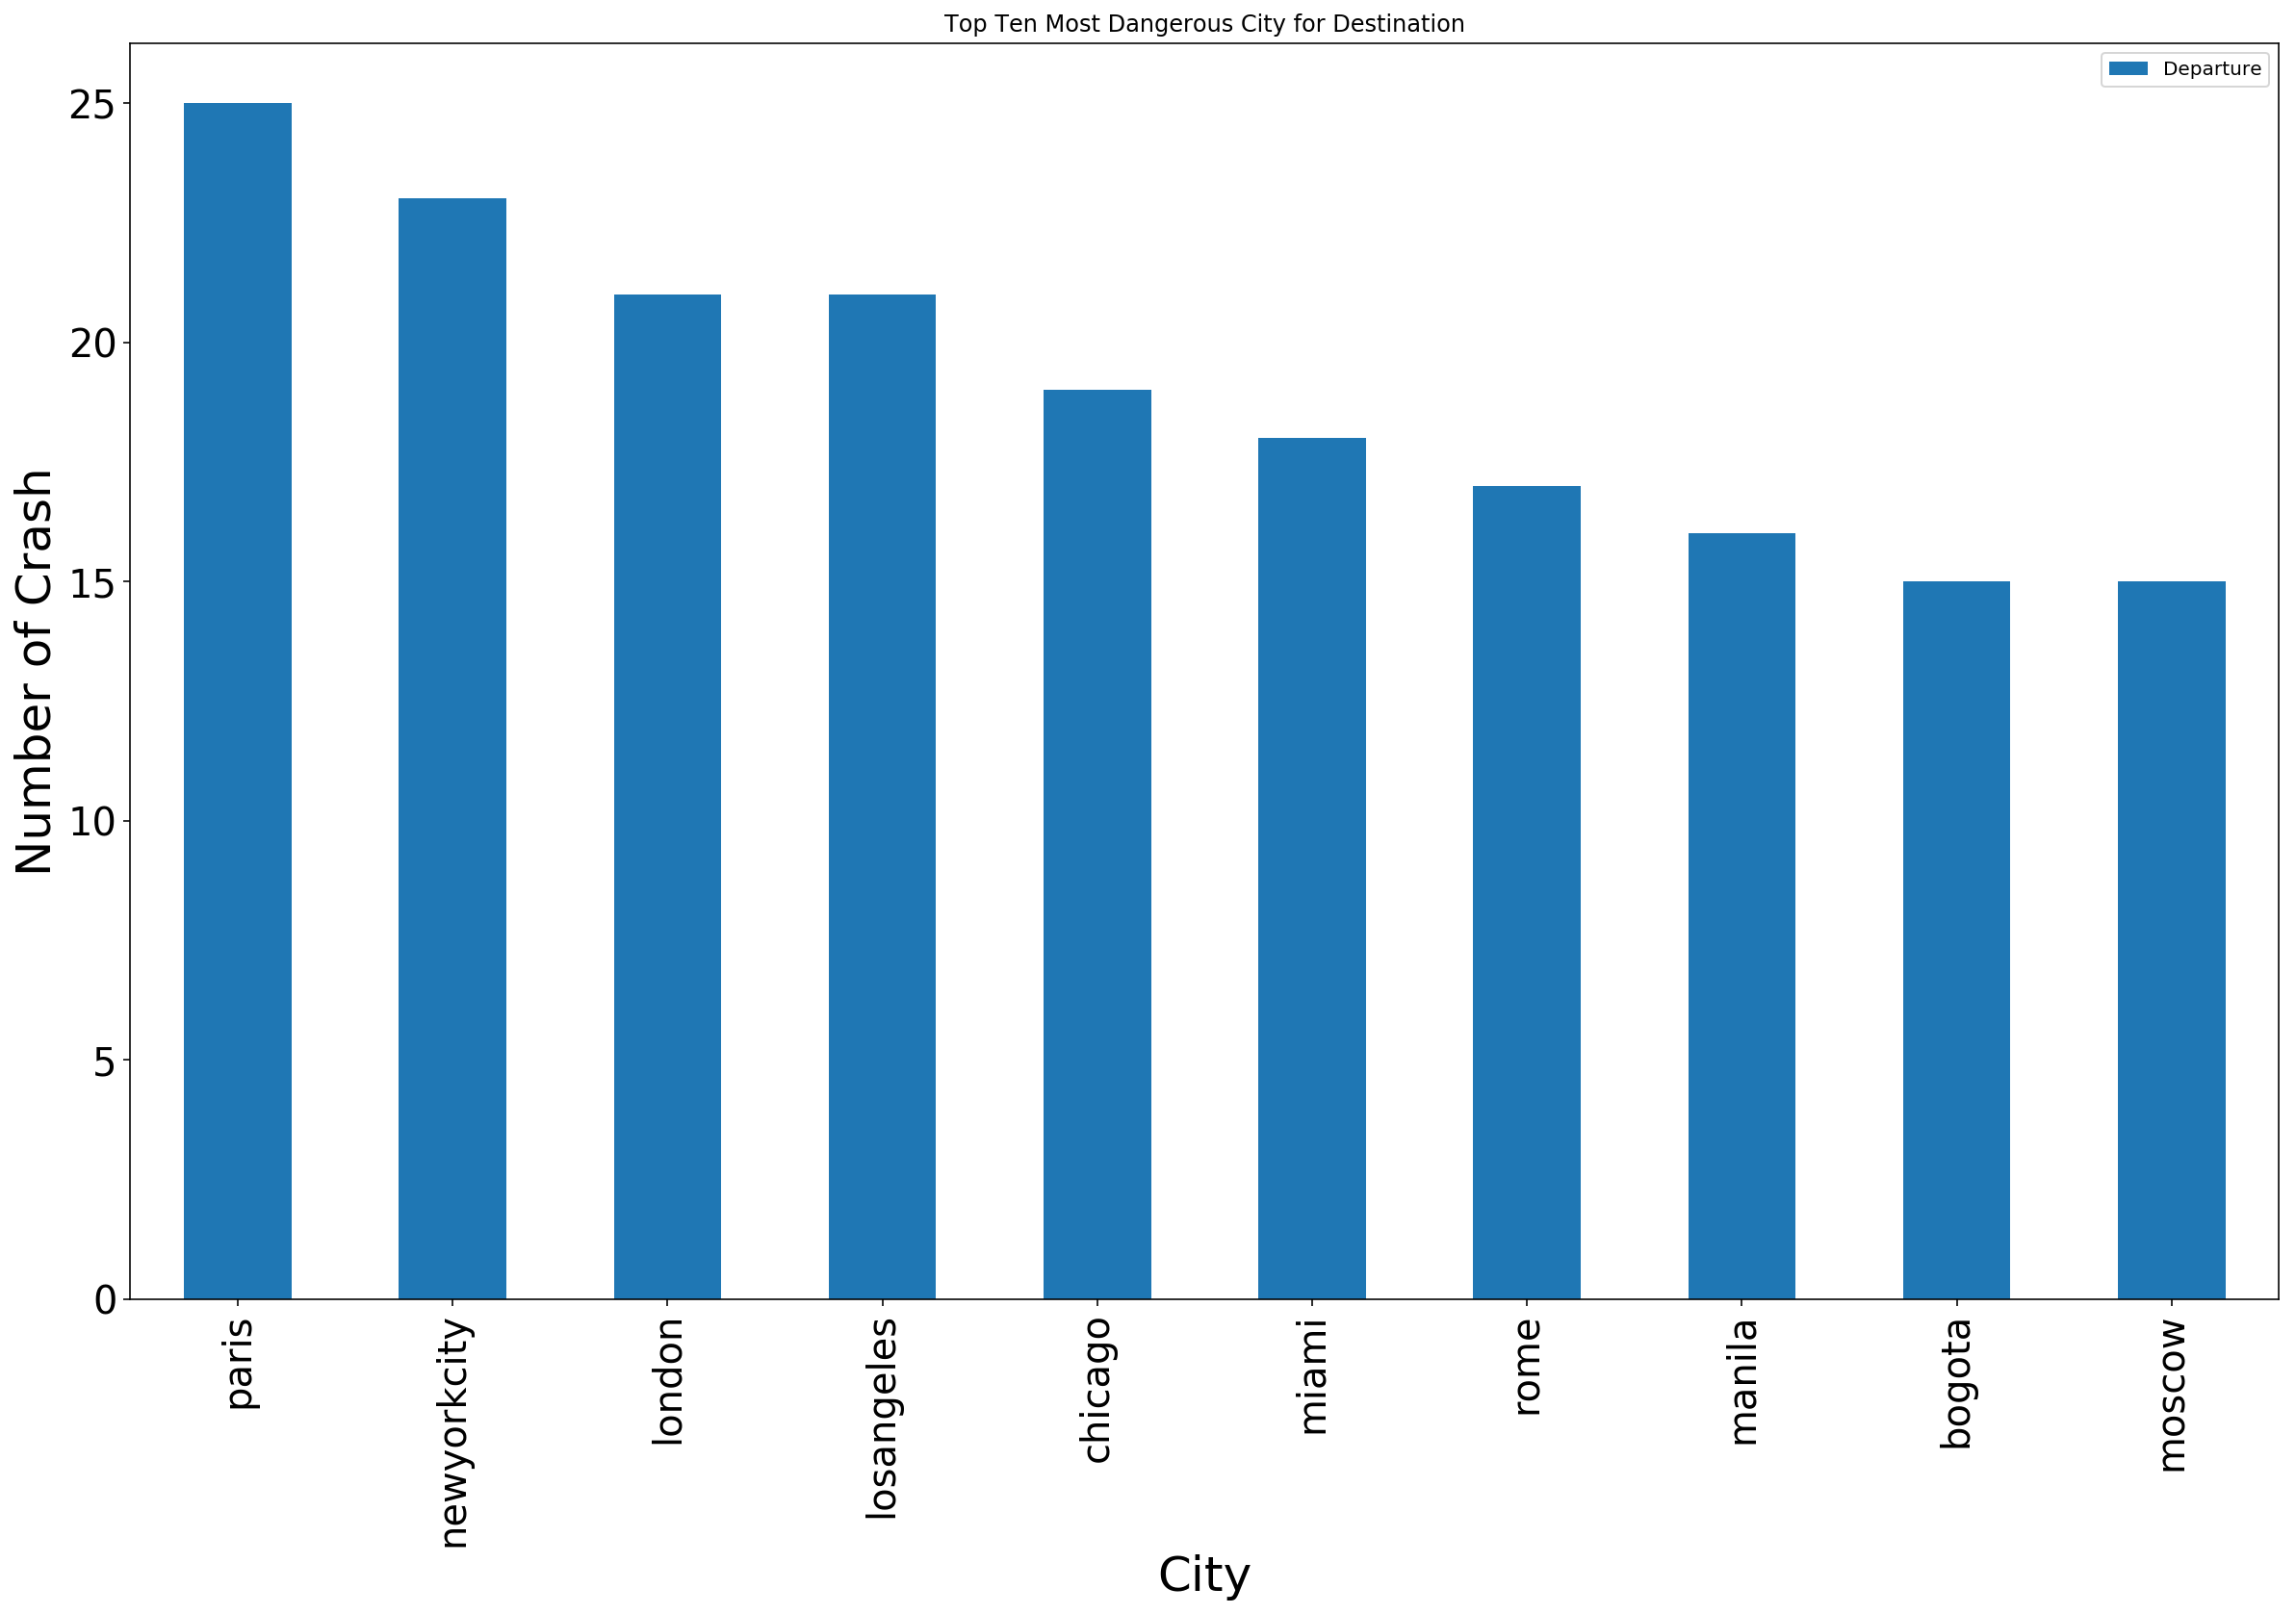

In [136]:
destination = dept2Dest.groupby(['Destination']).count().sort_values(by="Departure", ascending=False).head(10)
plot8 = destination.plot.bar(figsize=(20,12), title="Top Ten Most Dangerous City for Destination", fontsize=20)
plot8.set_xlabel("City", fontsize=25)
plot8.set_ylabel("Number of Crash", fontsize=25)

 # Trends/Behaviors

1. Airplane crash significantly decreased after 2000
2. Survival rate increases over the years
3. The most dangerous cities for departure/destination are the famous ones.